In [22]:
# Import standard libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Move up one level to data, then access raw
file_path = '../data/raw/retail_sales_dataset.csv'

# Load the CSV file
retail_data = pd.read_csv(file_path)

# Display the first few rows of the data
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [24]:
# Convert 'date' to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

In [26]:
# Assuming retail_data is your DataFrame
retail_data['date'] = pd.to_datetime(retail_data['Date'])  # Ensure the 'date' column is in datetime format
retail_data['year'] = retail_data['Date'].dt.year
retail_data['month'] = retail_data['Date'].dt.month
retail_data['day_of_week'] = retail_data['Date'].dt.weekday
retail_data['quarter'] = retail_data['Date'].dt.quarter

print(retail_data.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount       date  year  month  \
0         3              50           150 2023-11-24  2023     11   
1         2             500          1000 2023-02-27  2023      2   
2         1              30            30 2023-01-13  2023      1   
3         1             500           500 2023-05-21  2023      5   
4         2              50           100 2023-05-06  2023      5   

   day_of_week  quarter  
0            4        4  
1            0        1  
2            4        1  
3            6        2  
4         

In [28]:
# Apply the rolling operation on 'Total Amount'
retail_data['rolling_avg_7'] = retail_data['Total Amount'].rolling(window=7).mean()  # 7-day rolling average

retail_data['rolling_avg_7']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
995    341.428571
996    211.428571
997    211.428571
998    224.285714
999    220.000000
Name: rolling_avg_7, Length: 1000, dtype: float64

In [29]:
# Drop any rows with missing values in the rolling average (due to the initial NaNs)
retail_data = retail_data.dropna(subset=['rolling_avg_7'])

In [30]:
# Group by month to get total sales per month
retail_data_monthly_sales = retail_data.groupby(['year', 'month'])['Total Amount'].sum().reset_index()

# Sort by 'total amount' in descending order
retail_data_monthly_sales = retail_data_monthly_sales.sort_values(by='Total Amount', ascending=False)

# Reset the index for better readability
retail_data_monthly_sales.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(retail_data_monthly_sales)

    year  month  Total Amount
0   2023      5         52550
1   2023     10         46580
2   2023     12         44690
3   2023      2         43060
4   2023      8         36960
5   2023      6         36715
6   2023      7         35465
7   2023      1         35420
8   2023     11         34770
9   2023      4         33840
10  2023      3         28990
11  2023      9         23620
12  2024      1          1530


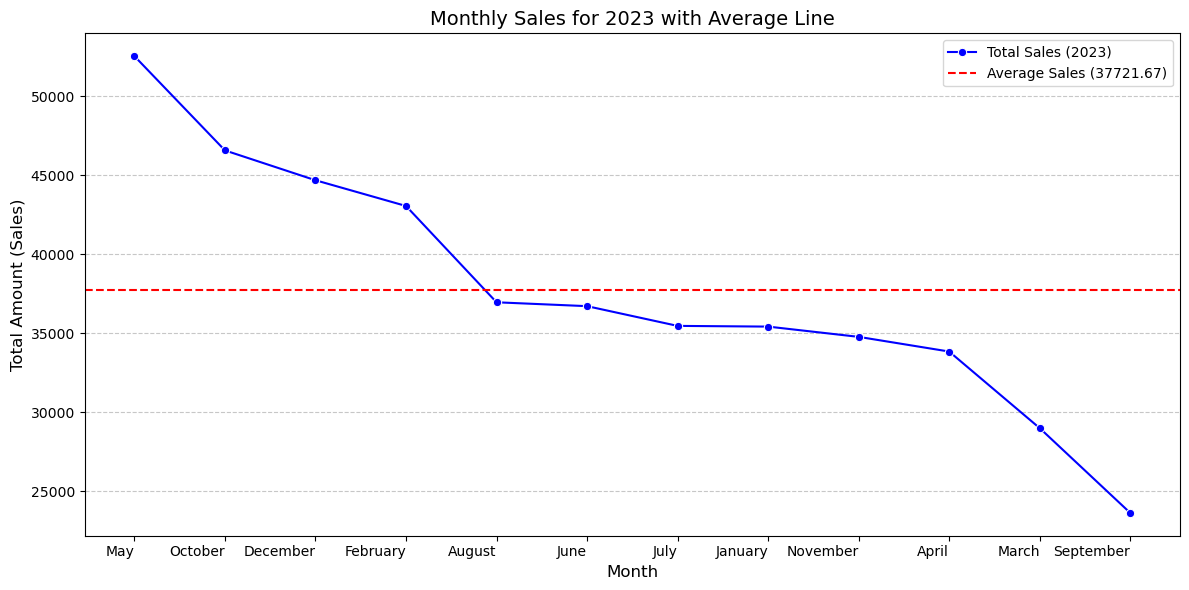

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Filter the data for the year 2023
retail_data_2023 = retail_data_monthly_sales[retail_data_monthly_sales['year'] == 2023].copy()

# Replace month numbers with month names
retail_data_2023['Month Name'] = retail_data_2023['month'].apply(lambda x: calendar.month_name[x])

# Calculate the average total sales
average_sales = retail_data_2023['Total Amount'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month Name', y='Total Amount',
    data=retail_data_2023,
    marker='o', color='blue', label='Total Sales (2023)'
)

# Add the average line
plt.axhline(y=average_sales, color='red', linestyle='--', label=f'Average Sales ({average_sales:.2f})')

# Customize labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Amount (Sales)", fontsize=12)
plt.title("Monthly Sales for 2023 with Average Line", fontsize=14)
plt.xticks(rotation=360, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [32]:
# Create features and target
X = retail_data[['year', 'month', 'day_of_week', 'quarter', 'rolling_avg_7']]
y = retail_data['Total Amount']

In [33]:
# Train-test split (e.g., using the last 20% of data for testing)
train_size = int(0.8 * len(retail_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [34]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict on the test set
y_pred = model.predict(X_test)

In [39]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error: 200764.3405885524
R-squared: 0.13895699088132152
Root Mean Squared Error (RMSE): 448.06733934594297


In [40]:
# Calculate the mean of 'Total Amount' for comparison
mean_total_amount = retail_data['Total Amount'].mean()

# Calculate RMSE as a percentage of the mean total amount
rmse_percentage = (448.07 / mean_total_amount) * 100
print(f"RMSE as percentage of mean Total Amount: {rmse_percentage:.2f}%")


RMSE as percentage of mean Total Amount: 98.06%


**98.06% RMSE** as a percentage means that, on average, the model's predictions deviate by almost the entire value of the mean Total Amount. This is quite high and likely not acceptable in most scenarios.